In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [35]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [68]:
X_train = train['features']
y_train = train['labels']
X_valid  = valid['features'] 
y_valid = valid['labels']
X_test = test['features']
y_test = test['labels']
X = X_test

RANDOM IMAGE FROM TRAIN SET

37

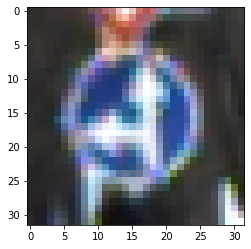

In [37]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

10 X 10 GRID

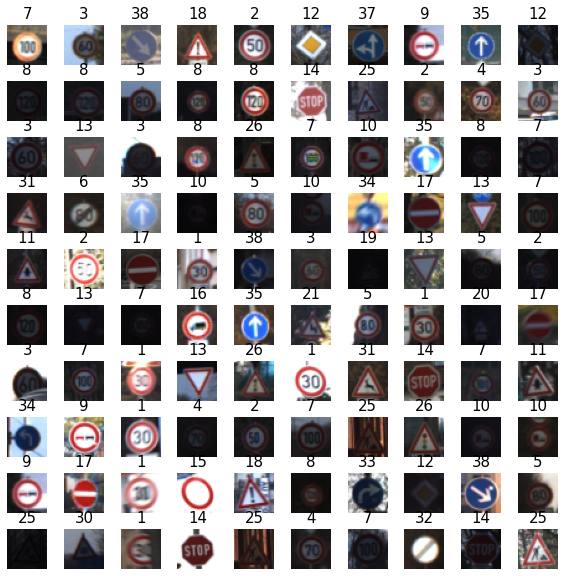

In [38]:
fig, axes = plt.subplots(10, 10, figsize = (10,10))
axes = axes.ravel() 
len_training = len(X_train) 

for i in np.arange(0, 10*10):
    index = np.random.randint(0, len_training)    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

5 X 5 GRID

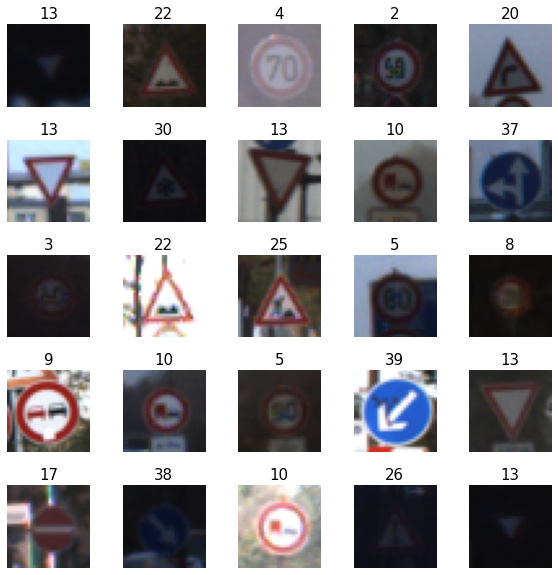

In [39]:
fig, axes = plt.subplots(5, 5, figsize = (10,10))
axes = axes.ravel() 
len_training = len(X_train) 

for i in np.arange(0, 5*5):
    index = np.random.randint(0, len_training)    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

<Figure size 432x288 with 0 Axes>

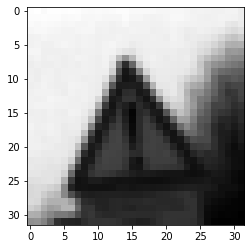

<Figure size 432x288 with 0 Axes>

In [43]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
a  = random.randint(1, len(X_train))
plt.imshow(X_train[a].squeeze(), cmap = 'gray')
plt.figure()

GRAYSCALE

In [45]:

X_train = np.sum(X_train/3, axis = 3, keepdims= True)
X_test = np.sum(X_test/3, axis = 3, keepdims= True)
X_valid = np.sum(X_valid/3, axis = 3, keepdims= True)
X_train.shape

(34799, 32, 32, 1)

<Figure size 432x288 with 0 Axes>

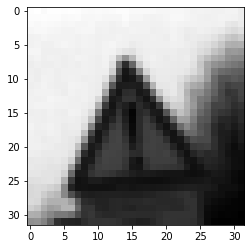

<Figure size 432x288 with 0 Axes>

In [46]:
plt.imshow(X_train[a].squeeze(), cmap = 'gray')
plt.figure()

NORMALIZATION

In [47]:
X_train = (X_train - 128)/128
X_test = (X_test - 128)/128
X_valid = (X_valid - 128)/128
X_train

array([[[[-0.93721065],
         [-0.94010417],
         [-0.94270833],
         ...,
         [-0.86255787],
         [-0.86197917],
         [-0.89149306]],

        [[-0.92390046],
         [-0.92534722],
         [-0.92476852],
         ...,
         [-0.87355324],
         [-0.86574074],
         [-0.88657407]],

        [[-0.91087963],
         [-0.90885417],
         [-0.90653935],
         ...,
         [-0.88715278],
         [-0.89091435],
         [-0.90248843]],

        ...,

        [[-0.79803241],
         [-0.79571759],
         [-0.79542824],
         ...,
         [-0.95457176],
         [-0.9447338 ],
         [-0.94097222]],

        [[-0.84375   ],
         [-0.85011574],
         [-0.85648148],
         ...,
         [-0.93923611],
         [-0.93605324],
         [-0.94618056]],

        [[-0.8431713 ],
         [-0.83940972],
         [-0.83043981],
         ...,
         [-0.93865741],
         [-0.92881944],
         [-0.92679398]]],


       [[[-0.93084491],


<Figure size 432x288 with 0 Axes>

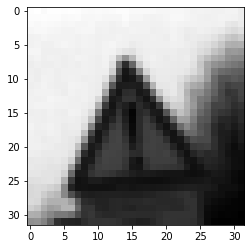

<Figure size 432x288 with 0 Axes>

In [48]:
plt.imshow(X_train[a].squeeze(), cmap = 'gray')
plt.figure()


CNN MODEL

In [49]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [50]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics =  ['accuracy'])

In [52]:
history = CNN.fit(X_train,
                 y_train,
                 batch_size = 500,
                 epochs = 100,
                 verbose = 1,
                 validation_data = (X_valid, y_valid))

Epoch 1/100
70/70 [==============================] - 5s 67ms/step - loss: 0.3544 - accuracy: 0.8936 - val_loss: 0.4318 - val_accuracy: 0.8862
Epoch 2/100
70/70 [==============================] - 5s 66ms/step - loss: 0.3541 - accuracy: 0.8940 - val_loss: 0.4228 - val_accuracy: 0.8868
Epoch 3/100
70/70 [==============================] - 5s 67ms/step - loss: 0.3393 - accuracy: 0.9013 - val_loss: 0.4394 - val_accuracy: 0.8832
Epoch 4/100
70/70 [==============================] - 4s 63ms/step - loss: 0.3394 - accuracy: 0.9002 - val_loss: 0.4287 - val_accuracy: 0.8785
Epoch 5/100
70/70 [==============================] - 5s 66ms/step - loss: 0.3352 - accuracy: 0.8997 - val_loss: 0.4259 - val_accuracy: 0.8828
Epoch 6/100
70/70 [==============================] - 5s 68ms/step - loss: 0.3264 - accuracy: 0.9018 - val_loss: 0.4556 - val_accuracy: 0.8751
Epoch 7/100
70/70 [==============================] - 5s 70ms/step - loss: 0.3187 - accuracy: 0.9058 - val_loss: 0.4230 - val_accuracy: 0.8796
Epoch 

70/70 [==============================] - 5s 69ms/step - loss: 0.1638 - accuracy: 0.9506 - val_loss: 0.3696 - val_accuracy: 0.9036
Epoch 59/100
70/70 [==============================] - 5s 69ms/step - loss: 0.1643 - accuracy: 0.9499 - val_loss: 0.3787 - val_accuracy: 0.9041
Epoch 60/100
70/70 [==============================] - 5s 72ms/step - loss: 0.1528 - accuracy: 0.9543 - val_loss: 0.4047 - val_accuracy: 0.8923
Epoch 61/100
70/70 [==============================] - 5s 74ms/step - loss: 0.1688 - accuracy: 0.9485 - val_loss: 0.3613 - val_accuracy: 0.9048
Epoch 62/100
70/70 [==============================] - 5s 68ms/step - loss: 0.1518 - accuracy: 0.9554 - val_loss: 0.4042 - val_accuracy: 0.8930
Epoch 63/100
70/70 [==============================] - 5s 66ms/step - loss: 0.1539 - accuracy: 0.9526 - val_loss: 0.3545 - val_accuracy: 0.9059
Epoch 64/100
70/70 [==============================] - 5s 66ms/step - loss: 0.1522 - accuracy: 0.9540 - val_loss: 0.3953 - val_accuracy: 0.8941
Epoch 65/100

PERFORMANCE EVALUATION

In [58]:
score = CNN.evaluate(X_test, y_test)
print('Test Accuracy: ',score[1])

395/395 [==============================] - 1s 2ms/step - loss: 0.5585 - accuracy: 0.9030
Test Accuracy:  0.9030086994171143


In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [60]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

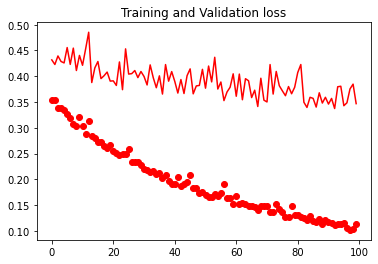

In [61]:
n_epochs = range(len(accuracy))
plt.plot(n_epochs, loss, 'ro', label = 'Training loss')
plt.plot(n_epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

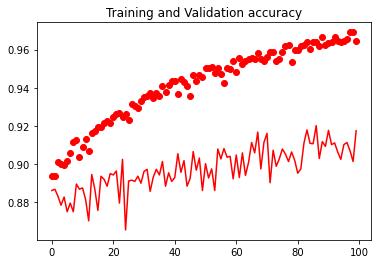

In [62]:
plt.plot(n_epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(n_epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

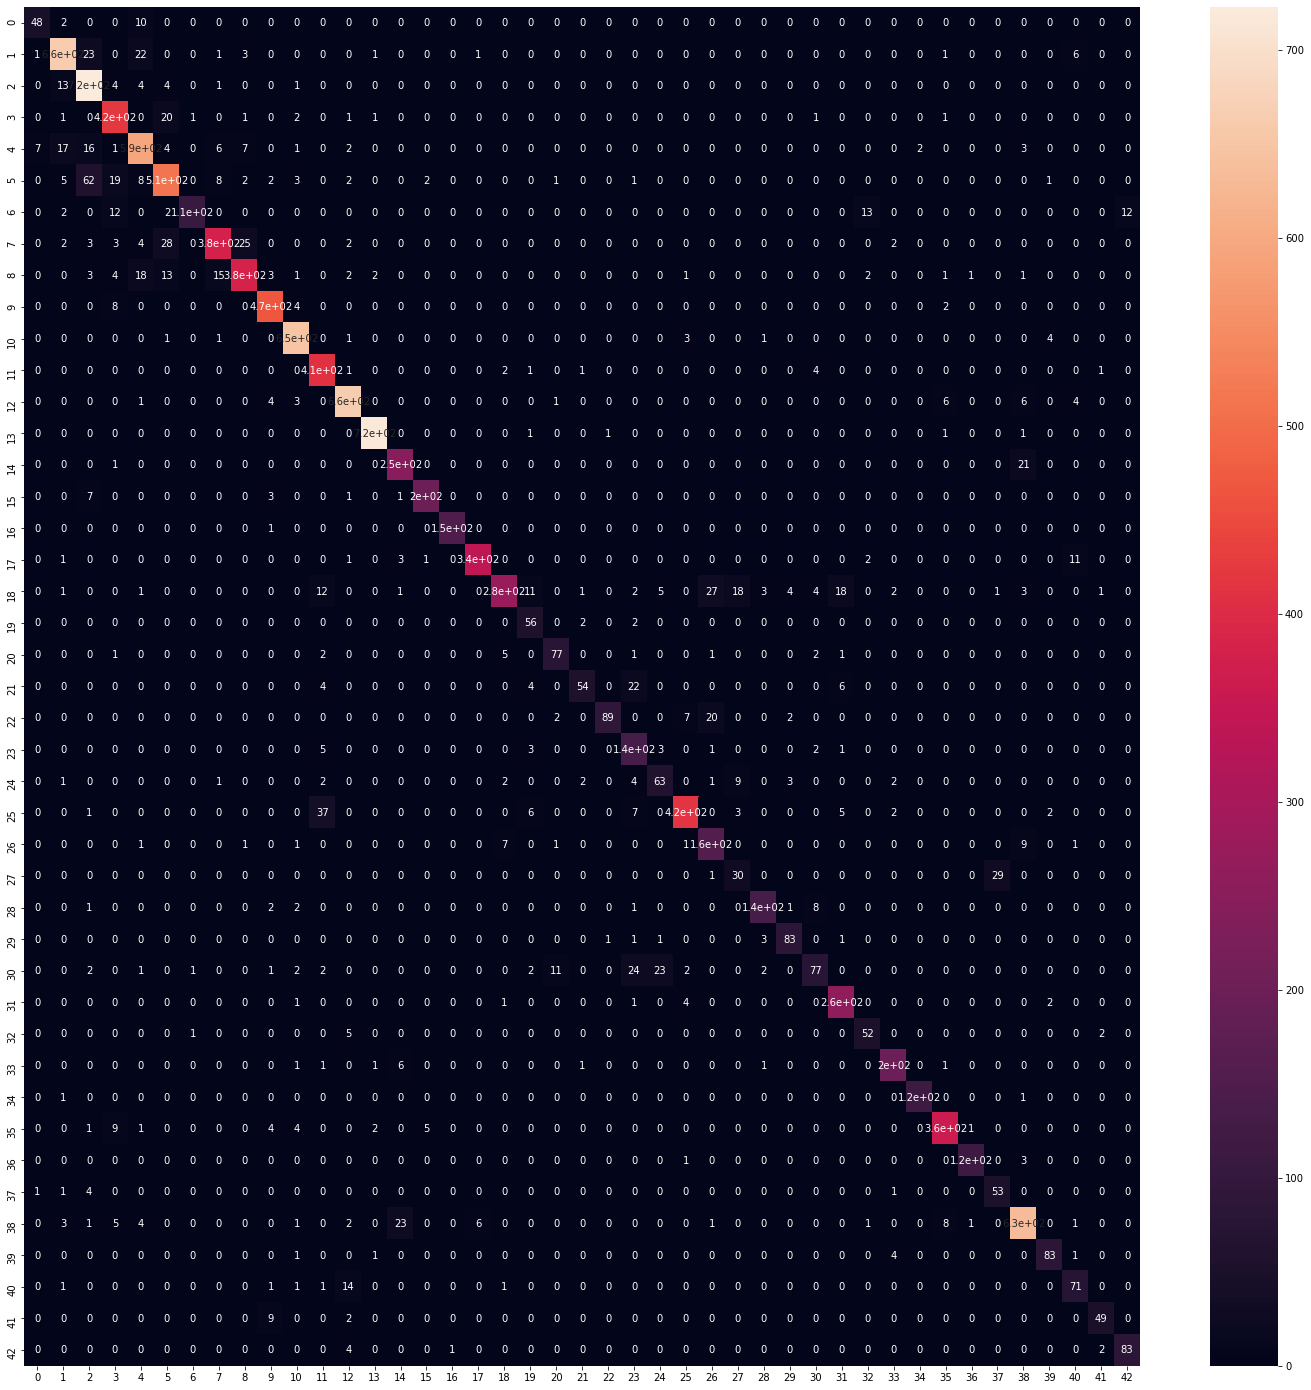

In [66]:
predicted_classes = CNN.predict_classes(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

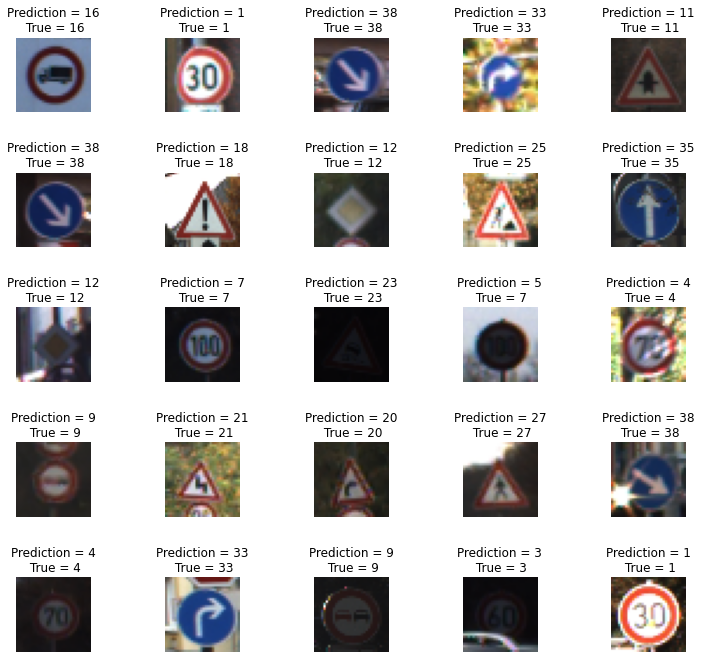

In [70]:
fig, axes = plt.subplots(5, 5, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, 5*5):
    axes[i].imshow(X[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    